## DATA CREATION

15th March

The goal of this notebook is creating a dataset of signals with noise that the CNN has to correctly filter and classify.

In [1]:
import random
from math import log, sin, pi
import matplotlib.pyplot as plt
#NB: we decide to avoid numpy

In [2]:
random.seed(12345)

#FIRST FUNCTION
#generation of a double exponential centered in bias and with typical scale DX.
step = lambda DX, bias : round(((log(random.random()))*DX) * 2*(random.randint(0,1)-0.5) + bias)  
    
example = []
for i in range(10): example.append(step(50,5))
print(example)

[49, -5, 13, -60, 96, -2, 34, 30, 57, -27]


In [3]:
def pattern(y,z,a,i):
    '''....'''
    return round((3-2*y) * a * sin((pi*i)/z))

In [4]:
random.seed(12345)

#Pattern features:
Z = 12
A = 600


#Data features:
N = 10000
L = 60

DX = 50
bias = 5

y = [0] * N
x = [[0] * L for i in range(N)]

In [5]:
#DATA generation:

for n in range(N):
    if n>0:
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1] + step(DX,bias)
        
    y[n] = n%3
    if y[n] > 0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)

[0, 49, 44, 57, -3, 93, 91, 125, 155, 212] 0
[1036, 1055, 1005, 1114, 1052, 1213, 1241, 1339, 1279, 1265] 1
[1751, 1761, 1674, 1687, 1713, 1730, 1764, 1887, 1815, 1745] 2


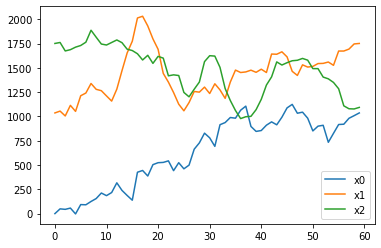

In [6]:
#verify:

for n in range(3): print(x[n][:10],y[n])
plt.plot(x[0], label='x0')
plt.plot(x[1], label='x1')
plt.plot(x[2], label='x2')
plt.legend()
plt.show()

In [7]:
!mkdir DATA

import csv
str0 = f"ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}"
print(str0)

fname = 'DATA/x_'+str0+'.csv'
with open(fname, mode = 'w') as myfile:
    writer = csv.writer(myfile)
    for n in range(N):
        writer.writerow(x[n])
        
fname = 'DATA/y_'+str0+'.csv'
with open(fname, mode = 'w') as myfile:
    writer = csv.writer(myfile)
    writer.writerows(map(lambda yy: [yy],y))
    #different command

mkdir: impossibile creare la directory "DATA": File già esistente
ts_L60_Z12_A600_DX50_bias5_N10000
